In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import skew, kurtosis, jarque_bera

sns.set_theme()

In [3]:
aapl = yf.download('AAPL',
                    start = '2020-01-01',
                    end = '2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
aapl.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582924,72.621661,70.876090,71.127881,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


<Axes: xlabel='Date'>

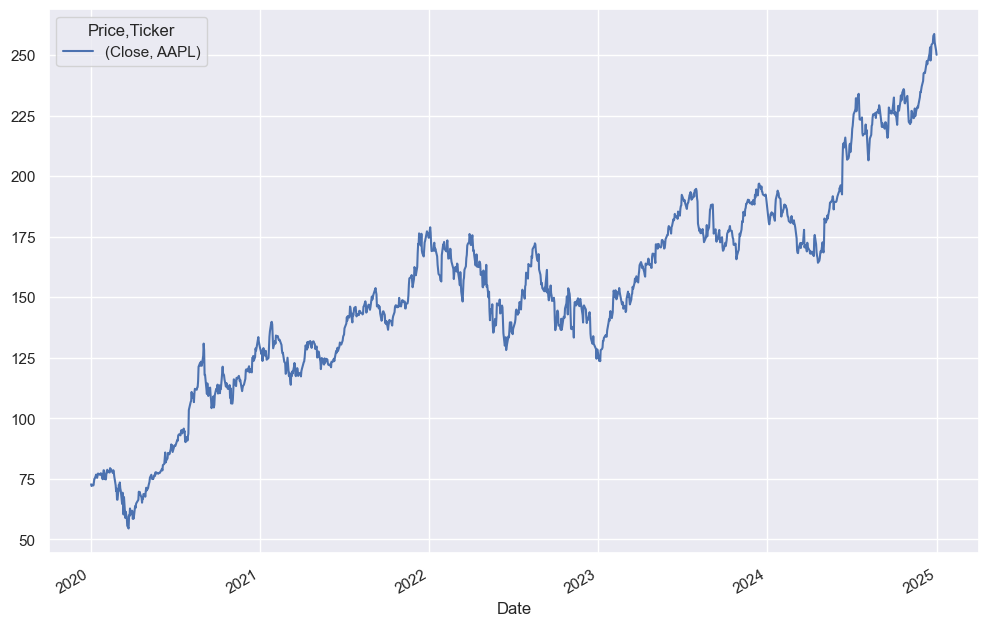

In [11]:
aapl[[('Close', 'AAPL')]].plot(kind = 'line', figsize = (12, 8))

In [17]:
close_values = aapl[('Close', 'AAPL')]
aapl[('log_returns', 'AAPL')] = np.log(close_values / close_values.shift(1))
aapl.dropna(inplace = True)

In [18]:
aapl.head()

Price,Close,High,Low,Open,Volume,log_returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,-0.009769
2020-01-06,72.582924,72.621661,70.876090,71.127881,118387200,0.007937
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000,-0.004714
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,0.015958
2020-01-09,74.962791,75.156472,74.132375,74.384158,170108400,0.021018


<Axes: xlabel='Date'>

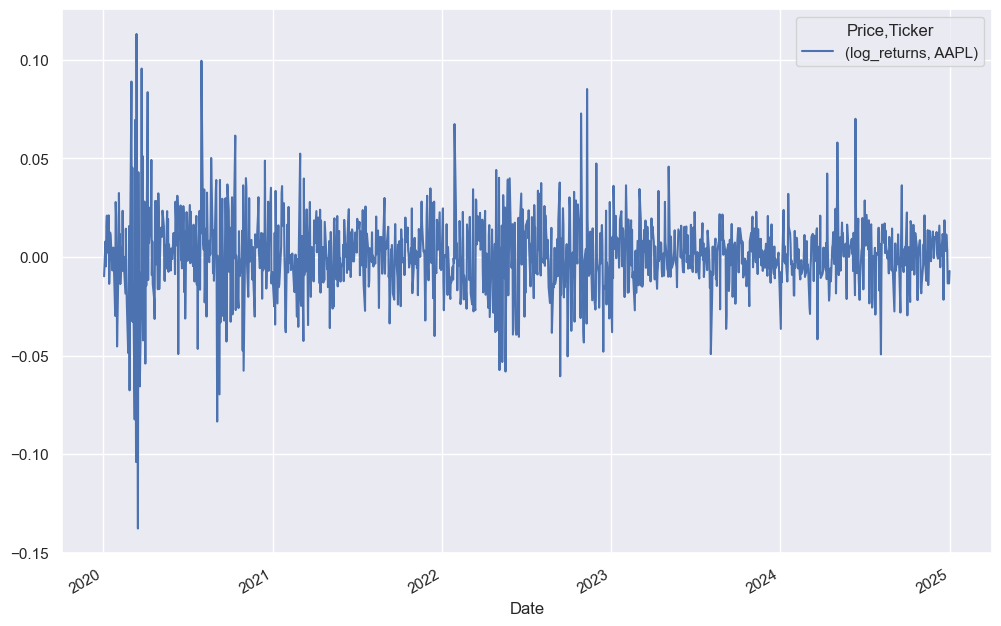

In [19]:
aapl[[('log_returns', 'AAPL')]].plot(kind = 'line', figsize = (12, 8))

<Axes: ylabel='Frequency'>

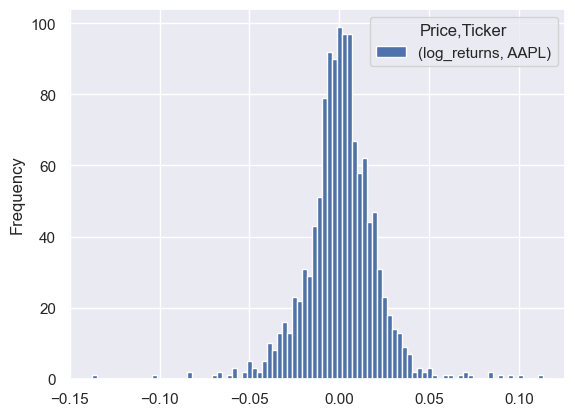

In [22]:
aapl[[('log_returns', 'AAPL')]].plot(kind = 'hist', bins = 90)

In [26]:
jarque_bera(aapl[[('log_returns', 'AAPL')]])

SignificanceResult(statistic=np.float64(1505.774855057566), pvalue=np.float64(0.0))

Veamos que el p-valor es inferir al nivel de significanci $\alpha = 0,05$

### Movimiento Browniano Geometrico
$$S_t = S_{(t-1)} e^{(\mu \Delta t + \sigma \varepsilon \sqrt{\Delta t})}$$

Donde $\varepsilon$ sigue una distribucion Normal estandar $(\varepsilon \sim N(0,1))$

In [3]:
exc = pd.read_excel('./Data/Rz5Ro6efSue-UaOnn2rnbg_d9afded38cb0434cb108f0a96206dcf1_Ejercicio-practico.xlsx')

In [6]:
tickers = ['NFLX', 'BABA', 'BRK-B']

data = yf.download(tickers, start = '2020-08-17', end='2021-08-16', group_by='ticker', threads=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

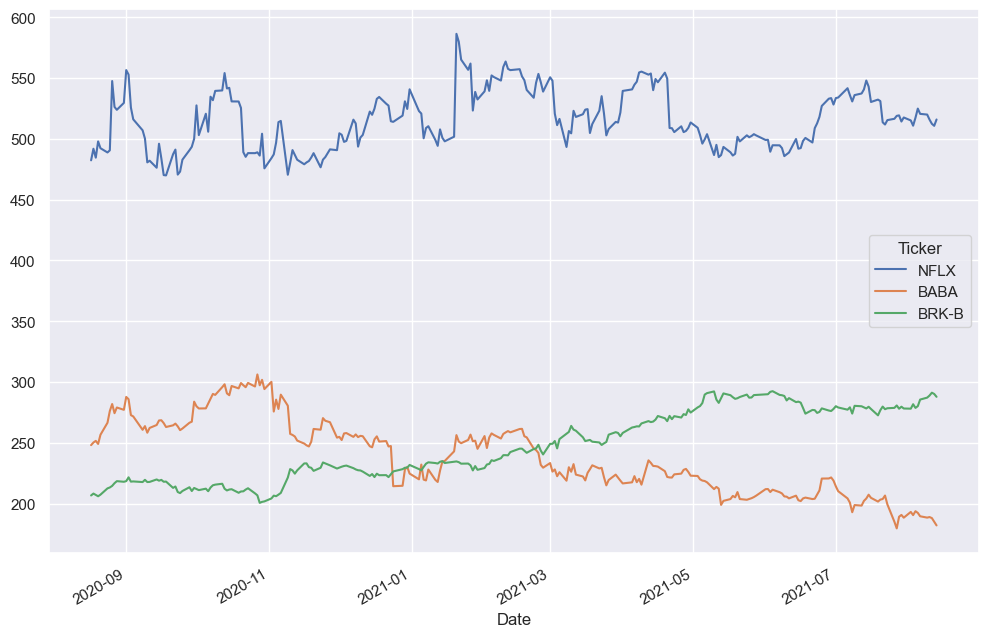

In [15]:
close_prices = data.xs('Close', axis=1, level=1)
close_prices.plot(kind = 'line', figsize = (12, 8))

<Axes: xlabel='Date'>

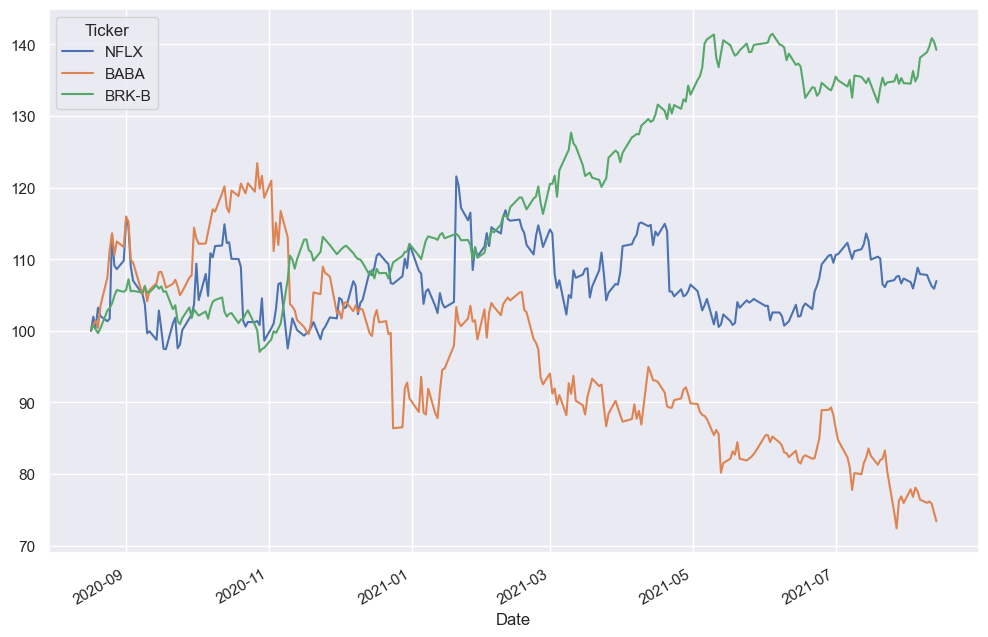

In [19]:
normalize_prices = close_prices.div(close_prices.iloc[0]).mul(100)
normalize_prices.plot(kind = 'line', figsize=(12, 8))